<a href="https://colab.research.google.com/github/mevlt01001/fashion-mnist-cnn/blob/main/Fashion_MNIST_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img src="https://miro.medium.com/v2/resize:fit:1358/1*ASBL6bFOdz1KWLAgfKwsvw.gif" width="600" />

# Libraries

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Load Data

In [ ]:
from tensorflow.keras.datasets import fashion_mnist
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 1us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
print(f'X_train shape: {X_train.shape}')
print(f'y_train shape: {y_train.shape}')
print(f'X_test shape: {X_test.shape}')
print(f'y_test shape: {y_test.shape}')
print(f'Train samples: {X_train.shape[0]}')
print(f'Test samples: {X_test.shape[0]}')

X_train shape: (60000, 28, 28)
y_train shape: (60000,)
X_test shape: (10000, 28, 28)
y_test shape: (10000,)
Train samples: 60000
Test samples: 10000


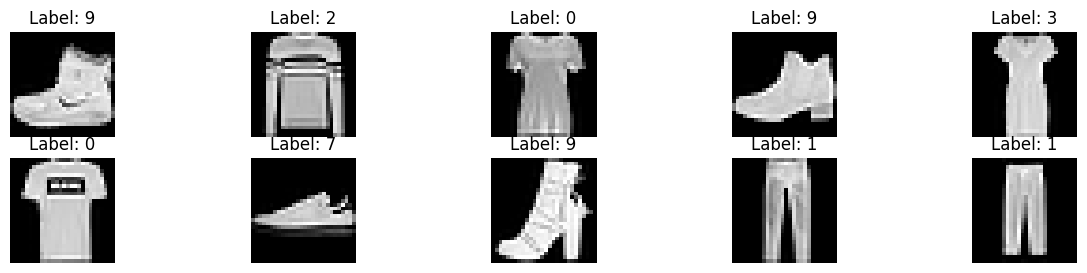

In [ ]:
# İlk görsellerden bazılarını görselleştirelim
fig, axes = plt.subplots(2, 5, figsize=(15, 3))
for i in range(2):
    for j in range(5):
        axes[i,j].imshow(X_train[i + j*5], cmap='gray')
        axes[i,j].set_title(f'Label: {y_train[i + j*5]}')
        axes[i,j].axis('off')
plt.show()

In [ ]:
# Normalize edelim
X_train = X_train / 255.0
X_test = X_test / 255.0

CNN mimarileri bizden görüntünün boyutu ile birlikte bir de kanal sayısını bekler. Elimizdeki veri de kanal sayısı bulunmuyor.

In [ ]:
# Kanal boyutunu eklemek için reshape yapalım
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1)
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)

print(f'Yeni X_train shape: {X_train.shape}')
print(f'Yeni X_test shape: {X_test.shape}')

Yeni X_train shape: (60000, 28, 28, 1)
Yeni X_test shape: (10000, 28, 28, 1)


hadef değişkenleri one-hot encoded hale getirelim

In [ ]:
np.unique(y_train)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [ ]:
np.unique(y_test)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [ ]:
# encoding
from tensorflow.keras.utils import to_categorical
y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)

In [ ]:
np.unique(y_train)

array([0., 1.])

In [ ]:
np.unique(y_test)

array([0., 1.])

# Modelling

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

# Modeli oluşturma
model = Sequential()

# İlk Convolutional katmanı ve MaxPooling katmanı
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(MaxPooling2D(pool_size=(2, 2)))

# İkinci Convolutional ve MaxPooling katmanları
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Flatten katmanı ve Fully Connected katmanlar
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='softmax'))  # 10 sınıf olduğu için çıkış katmanı

# Model özetini gösterelim
model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 26, 26, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 13, 13, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 11, 11, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 5, 5, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 1600)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │         204,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 225,034 (879.04 KB)

 Trainable params: 225,034 (879.04 KB)

 Non-trainable params: 0 (0.00 B)

# Model Compiling and Training

In [ ]:
from tensorflow.keras.optimizers import Adam

# Modelin derlenmesi (compile edilmesi)
model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

# Modelin eğitilmesi
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=128)


Epoch 1/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 9s 8ms/step - accuracy: 0.7310 - loss: 0.7713 - val_accuracy: 0.8421 - val_loss: 0.4366
Epoch 2/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8698 - loss: 0.3580 - val_accuracy: 0.8794 - val_loss: 0.3391
Epoch 3/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8886 - loss: 0.3051 - val_accuracy: 0.8905 - val_loss: 0.3055
Epoch 4/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.9016 - loss: 0.2708 - val_accuracy: 0.8881 - val_loss: 0.3126
Epoch 5/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9091 - loss: 0.2460 - val_accuracy: 0.9007 - val_loss: 0.2747
Epoch 6/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9176 - loss: 0.2239 - val_accuracy: 0.9026 - val_loss: 0.2678
Epoch 7/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9250 - loss: 0.2040 - val_accuracy: 0.9072 - val_loss: 0.2568
Epoch 8/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9289 - loss: 0.1892 - val_accuracy: 0.

# Predicting

In [ ]:
# Model ile tahmin yapma
y_pred = model.predict(X_test)

# En yüksek olasılığı bulma (argmax kullanarak one-hot encoded veriyi sınıf etiketine dönüştürme)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


# Evaluation

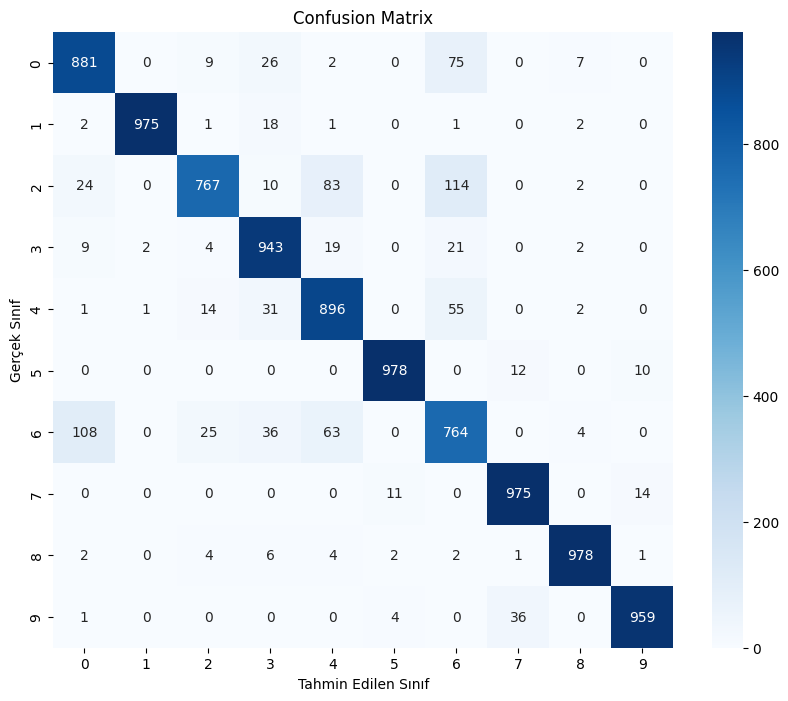

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Karışıklık matrisini hesapla
cm = confusion_matrix(y_true, y_pred_classes)

# Karışıklık matrisini görselleştir
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Tahmin Edilen Sınıf')
plt.ylabel('Gerçek Sınıf')
plt.title('Confusion Matrix')
plt.show()


In [ ]:
from sklearn.metrics import classification_report

# Sınıflandırma raporunu oluştur
report = classification_report(y_true, y_pred_classes)
print('Sınıflandırma Raporu:')
print(report)

Sınıflandırma Raporu:
              precision    recall  f1-score   support

           0       0.86      0.88      0.87      1000
           1       1.00      0.97      0.99      1000
           2       0.93      0.77      0.84      1000
           3       0.88      0.94      0.91      1000
           4       0.84      0.90      0.87      1000
           5       0.98      0.98      0.98      1000
           6       0.74      0.76      0.75      1000
           7       0.95      0.97      0.96      1000
           8       0.98      0.98      0.98      1000
           9       0.97      0.96      0.97      1000

    accuracy                           0.91     10000
   macro avg       0.91      0.91      0.91     10000
weighted avg       0.91      0.91      0.91     10000

